<a href="https://colab.research.google.com/github/chrisaMel/Machine-Learning/blob/Bankruptcy-Classifier/BankruptcyClassifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
#1. Διαβάζει τα δεδομένα από το αρχείο excel.
from logging import exception
import pandas as pd

#Ανέβασμα αρχείου με δεδομένα
datafilelink = 'https://docs.google.com/spreadsheets/d/1xfNYsymJs0cuhcH7-Vi4hy0wB5uuujkf/export?format=xlsx'

#Επιτυχημένη λήψη του αρχείου
try :
  dataset = pd.read_excel(datafilelink)
  print('The file is properly read')
  print(dataset.head())

except FileNotFoundError:
 print('The file was not found, try chainging the name')

except Exception as e:
 print(" Some other error occured",{e})



The file is properly read
   365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0              1014.128862                    0.011751   
1               561.974631                    0.099662   
2               826.919025                    0.009594   
3               493.176956                    0.196284   
4               100.421465                    0.179038   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.038505                                        0.965479   
1                 0.015775                                        1.415467   
2                 0.093562                                        1.575034   
3                 0.000581                                        1.346780   
4                 0.000173                                        3.299687   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0           567.866550             0.532258                     545.195964   


In [78]:
print("Types of data \n")
print(dataset.info())

Types of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   365* ( Β.Υ / Κοστ.Πωλ )                         10716 non-null  float64
 1   Λειτ.Αποτ/Συν.Ενεργ. (ROA)                      10716 non-null  float64
 2   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ                         10716 non-null  float64
 3    ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  10716 non-null  float64
 4   (ΑΠΑΙΤ.*365) / ΠΩΛ.                             10716 non-null  float64
 5   Συν.Υποχρ/Συν.Ενεργ                             10716 non-null  float64
 6   Διάρκεια Παραμονής Αποθεμάτων                   10716 non-null  float64
 7   Λογαριθμος Προσωπικού                           10716 non-null  float64
 8   ΕΝΔΕΙΞΗ ΕΞΑΓΩΓΩΝ                                10716 non-null  int64  
 9   ΕΝΔΕΙΞΗ ΕΙΣΑΓΩΓΩΝ      

In [79]:
print("Description of the data \n")
print(dataset.describe())  # Στατιστικά περιγραφικά στοιχεία

Description of the data 

       365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
count             10716.000000                10716.000000   
mean                446.399496                    0.037484   
std                 386.634236                    0.126532   
min                   0.654350                   -0.600000   
25%                 173.160013                    0.004531   
50%                 325.365223                    0.028217   
75%                 570.802351                    0.080520   
max                1500.000000                    0.500000   

       ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ  \
count             10716.000000   
mean                  0.028929   
std                   0.038007   
min                   0.000000   
25%                   0.002010   
50%                   0.015143   
75%                   0.041418   
max                   0.200000   

        ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  (ΑΠΑΙΤ.*365) / ΠΩΛ.  \
count                         

In [80]:
# Ομαδοποίηση δεδομένων ανά έτος και κατάσταση (1 = υγιής, 2 = χρεοκοπημένη)
grouped_data = dataset.groupby(['ΕΤΟΣ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']).size().unstack()

# Αντικατάσταση των NaN με 0, αν υπάρχουν
grouped_data = grouped_data.fillna(0)

# Προεπισκόπηση των δεδομένων
print(grouped_data)


ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)     1   2
ΕΤΟΣ                                   
2006                           2748  52
2007                           2846  53
2008                           2731  99
2009                           2143  44


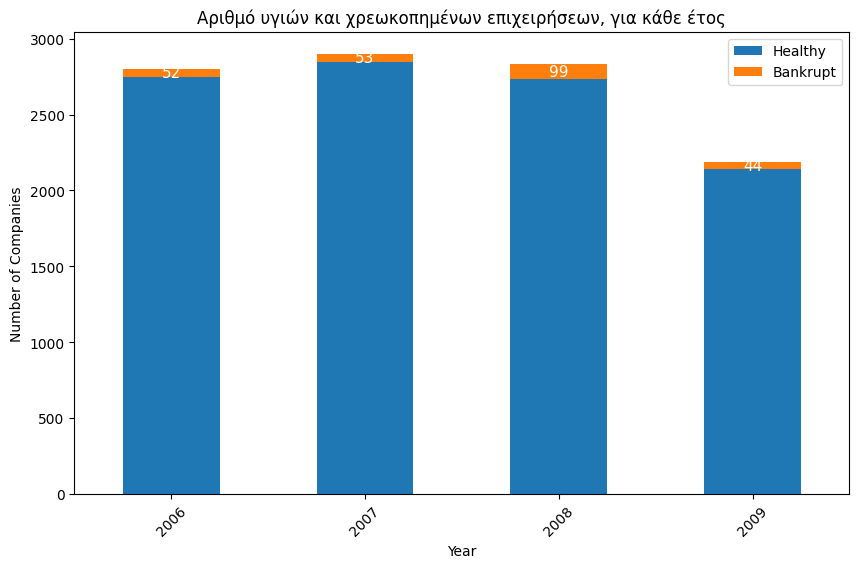

In [81]:
# 2.a) Tυπώνει, σε γραφήματα τον αριθμό υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος
import matplotlib.pyplot as plt

# # Δημιουργία stacked bar plot
# grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# # Προσθήκη τίτλου και ετικετών
# plt.title('Stacked Bar Plot of Companies per Year')
# plt.xlabel('Year')
# plt.ylabel('Total Number of Companies')
# plt.legend(['Healthy', 'Bankrupt'])
# plt.xticks(rotation=45)

# # Εμφάνιση του γραφήματος
# plt.show()


# Δημιουργία stacked bar plot για τον Αριθμό υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Προσθήκη ετικετών για τις bankrupt επιχειρήσεις (πάνω από το σωστό σημείο κάθε μπάρας)
for i, (healthy, bankrupt) in enumerate(zip(grouped_data[1], grouped_data[2])):
    # Ετικέτα για bankrupt (πάνω από το stacked μέρος)
    ax.text(i, healthy + bankrupt / 2, str(int(bankrupt)), ha='center', va='center', color='white', fontsize=11)

# Προσθήκη τίτλου και ετικετών αξόνων
plt.title('Αριθμό υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.legend(['Healthy', 'Bankrupt'])
plt.xticks(rotation=45)

# Εμφάνιση του γραφήματος
plt.show()


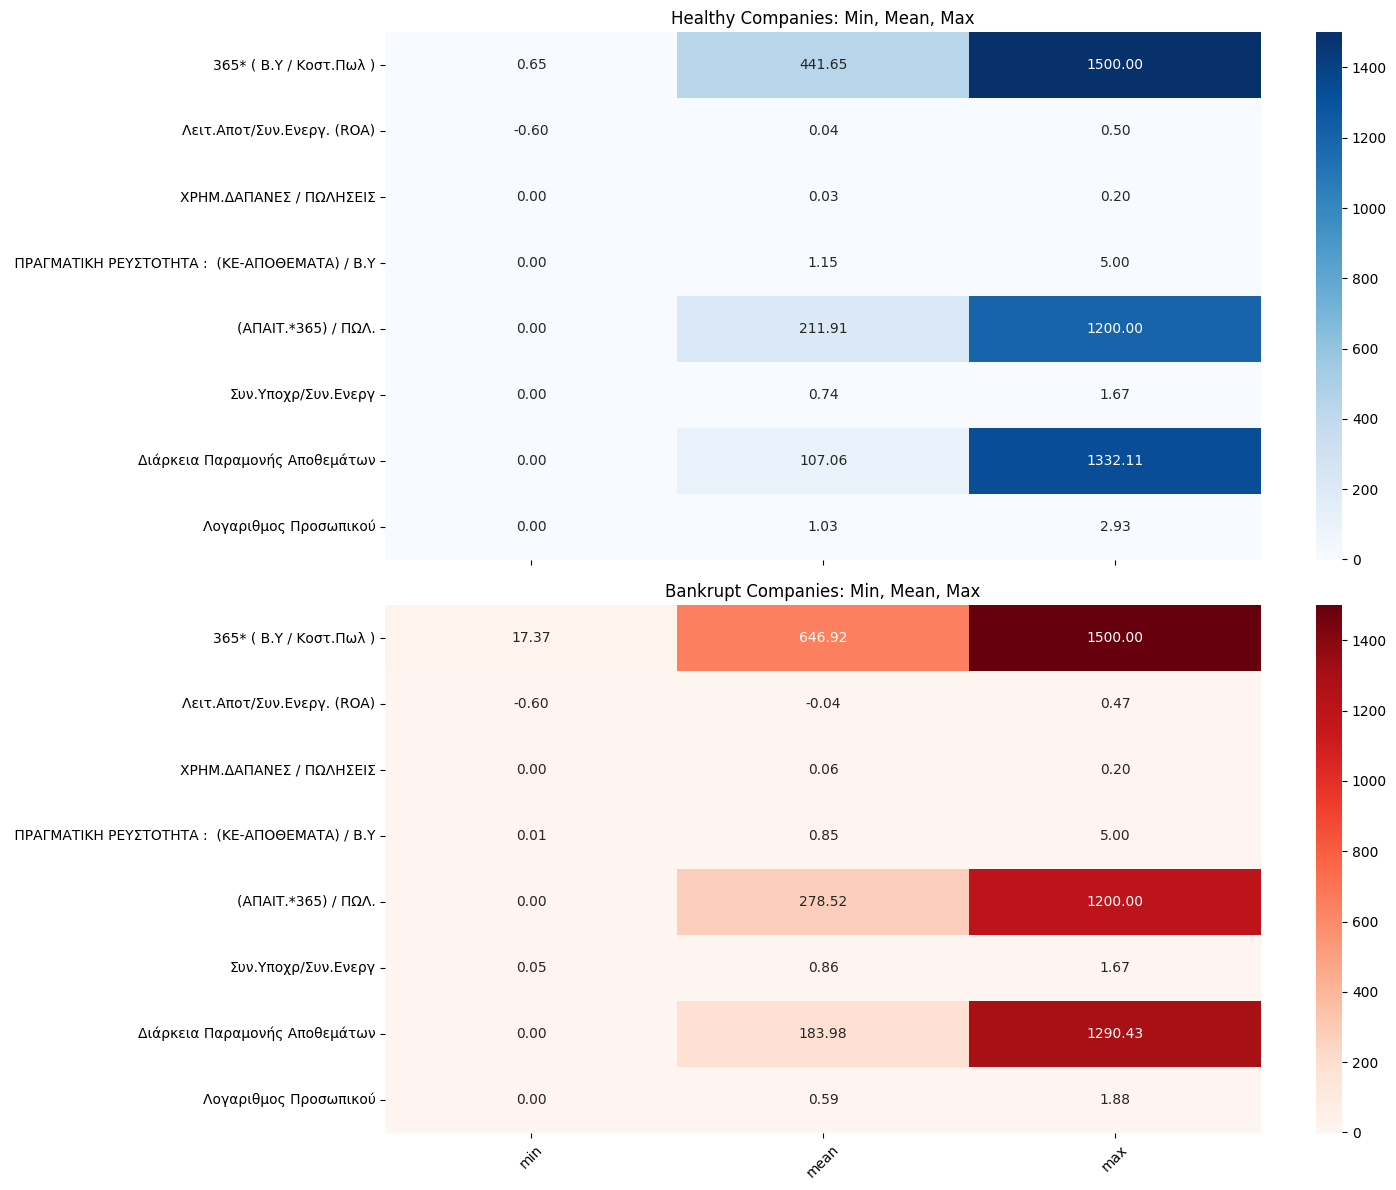

In [97]:
# 2.b) Tυπώνει, σε γραφήματα τα min, max, average τιμή για κάθε δείκτη
# Διαχωρισμός των δεδομένων
healthy = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1]
bankrupt = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 2]

# Λίστα με στήλες για ανάλυση
columns_to_analyze = [
    '365* ( Β.Υ / Κοστ.Πωλ )',
    'Λειτ.Αποτ/Συν.Ενεργ. (ROA)',
    'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ',
    ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ',
    '(ΑΠΑΙΤ.*365) / ΠΩΛ.',
    'Συν.Υποχρ/Συν.Ενεργ',
    'Διάρκεια Παραμονής Αποθεμάτων',
    'Λογαριθμος Προσωπικού'
]

# Dictionary για συντομευμένα labels
short_labels = {
    '365* ( Β.Υ / Κοστ.Πωλ )': 'Inventory Turnover',
    'Λειτ.Αποτ/Συν.Ενεργ. (ROA)': 'ROA',
    'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ': 'Fin Exp/Sales',
    ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ': 'Real Liquidity',
    '(ΑΠΑΙΤ.*365) / ΠΩΛ.': 'Receiv Turn',
    'Συν.Υποχρ/Συν.Ενεργ': 'Liab/Assets',
    'Διάρκεια Παραμονής Αποθεμάτων': 'Inv Days',
    'Λογαριθμος Προσωπικού': 'Log Employees'
}

# Υπολογισμός στατιστικών
healthy_stats = healthy[columns_to_analyze].describe().loc[['min', 'mean','max']]
bankrupt_stats = bankrupt[columns_to_analyze].describe().loc[['min', 'mean','max']]

# Μετονομασία των σειρών
healthy_stats = healthy_stats.rename(index=short_labels)
bankrupt_stats = bankrupt_stats.rename(index=short_labels)

# Δημιουργία του subplot
fig, axs = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Υγιείς εταιρείες heatmap
sns.heatmap(healthy_stats.T, annot=True, fmt=".2f", cmap='Blues', ax=axs[0])
axs[0].set_title('Healthy Companies: Min, Mean, Max')
axs[0].tick_params(axis='x')

# Πτωχευμένες εταιρείες heatmap
sns.heatmap(bankrupt_stats.T, annot=True, fmt=".2f", cmap='Reds', ax=axs[1])
axs[1].set_title('Bankrupt Companies: Min, Mean, Max')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


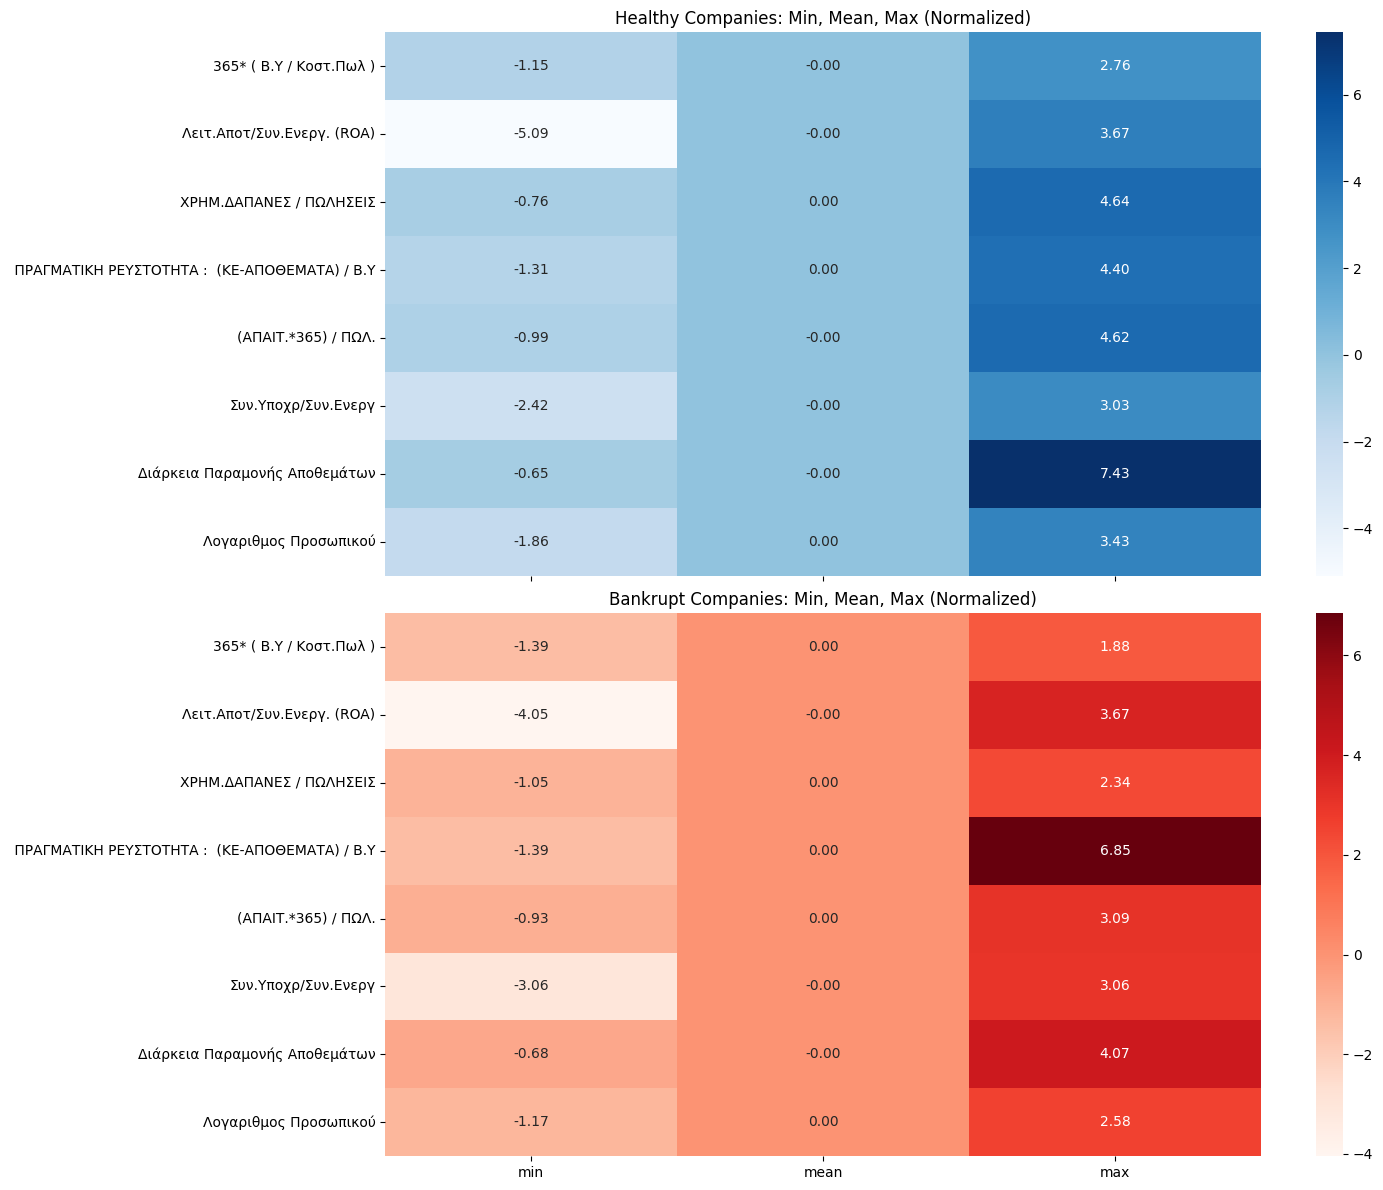

In [94]:
#Εναλλακτηκό figure 2
# from sklearn.preprocessing import StandardScaler
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Διαχωρισμός των δεδομένων
# healthy = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1]
# bankrupt = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 2]

# # Λίστα με στήλες για ανάλυση
# columns_to_analyze = [
#     '365* ( Β.Υ / Κοστ.Πωλ )',
#     'Λειτ.Αποτ/Συν.Ενεργ. (ROA)',
#     'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ',
#     ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ',
#     '(ΑΠΑΙΤ.*365) / ΠΩΛ.',
#     'Συν.Υποχρ/Συν.Ενεργ',
#     'Διάρκεια Παραμονής Αποθεμάτων',
#     'Λογαριθμος Προσωπικού'
# ]

# # Τυποποίηση (Z-Score) για υγιείς εταιρείες
# scaler = StandardScaler()
# healthy_standardized = pd.DataFrame(
#     scaler.fit_transform(healthy[columns_to_analyze]),
#     columns=columns_to_analyze
# )

# # Τυποποίηση (Z-Score) για πτωχευμένες εταιρείες
# bankrupt_standardized = pd.DataFrame(
#     scaler.fit_transform(bankrupt[columns_to_analyze]),
#     columns=columns_to_analyze
# )

# # Dictionary για συντομευμένα labels
# short_labels = {
#     '365* ( Β.Υ / Κοστ.Πωλ )': 'Inventory Turnover',
#     'Λειτ.Αποτ/Συν.Ενεργ. (ROA)': 'ROA',
#     'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ': 'Fin Exp/Sales',
#     ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ': 'Real Liquidity',
#     '(ΑΠΑΙΤ.*365) / ΠΩΛ.': 'Receiv Turn',
#     'Συν.Υποχρ/Συν.Ενεργ': 'Liab/Assets',
#     'Διάρκεια Παραμονής Αποθεμάτων': 'Inv Days',
#     'Λογαριθμος Προσωπικού': 'Log Employees'
# }

# # Υπολογισμός στατιστικών
# healthy_stats = healthy_standardized.describe().loc[['min', 'mean', 'max']]
# bankrupt_stats = bankrupt_standardized.describe().loc[['min', 'mean', 'max']]

# # Μετονομασία των σειρών
# healthy_stats = healthy_stats.rename(index=short_labels)
# bankrupt_stats = bankrupt_stats.rename(index=short_labels)

# # Δημιουργία του subplot
# fig, axs = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# # Υγιείς εταιρείες heatmap
# sns.heatmap(healthy_stats.T, annot=True, fmt=".2f", cmap='Blues', ax=axs[0])
# axs[0].set_title('Healthy Companies: Min, Mean, Max (Normalized)')
# axs[0].tick_params(axis='x')

# # Πτωχευμένες εταιρείες heatmap
# sns.heatmap(bankrupt_stats.T, annot=True, fmt=".2f", cmap='Reds', ax=axs[1])
# axs[1].set_title('Bankrupt Companies: Min, Mean, Max (Normalized)')
# axs[1].tick_params(axis='x')

# plt.tight_layout()
# plt.show()


In [98]:
# 3. Έλεγχος για τυχόν ελλιπείς εγγραφές
if dataset.isnull().values.any():
    print("Υπάρχουν ελλιπείς εγγραφές (NaN) στο dataset.")
    print(dataset.isnull().sum())  # Εμφάνιση του αριθμού των NaN ανά στήλη
else:
    print("Δεν υπάρχουν ελλιπείς εγγραφές (NaN) στο dataset.")

Δεν υπάρχουν ελλιπείς εγγραφές (NaN) στο dataset.


In [102]:
# 4. Κανονικοποίηση δεδομένων στο διάστημα [0,1]
#Κανονικοποίηση μόνο των τιμών που δεν είναι εξάρχησ στο διάστημα αυτό και εκτός το δείκτη Ενδειξη Ασυνέπειας

from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = [
    '365* ( Β.Υ / Κοστ.Πωλ )',
    'Λειτ.Αποτ/Συν.Ενεργ. (ROA)',
    'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ',
    ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ',
    '(ΑΠΑΙΤ.*365) / ΠΩΛ.',
    'Συν.Υποχρ/Συν.Ενεργ',
    'Διάρκεια Παραμονής Αποθεμάτων',
    'Λογαριθμος Προσωπικού'
]

# Δημιουργία του MinMaxScaler
scaler = MinMaxScaler()

# Εφαρμογή κανονικοποίησης
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

print("Τα δεδομένα έχουν κανονικοποιηθεί στο διάστημα [0,1].")
print(dataset.describe())

Τα δεδομένα έχουν κανονικοποιηθεί στο διάστημα [0,1].
       365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
count             10716.000000                10716.000000   
mean                  0.297293                    0.579531   
std                   0.257869                    0.115030   
min                   0.000000                    0.000000   
25%                   0.115054                    0.549574   
50%                   0.216568                    0.571106   
75%                   0.380265                    0.618654   
max                   1.000000                    1.000000   

       ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ  \
count             10716.000000   
mean                  0.144647   
std                   0.190035   
min                   0.000000   
25%                   0.010050   
50%                   0.075716   
75%                   0.207091   
max                   1.000000   

        ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  (ΑΠΑΙΤ.*365) / ΠΩΛ.  \
co

In [1]:
!pip install colabcode



fatal: not a git repository (or any of the parent directories): .git
